# Final Project

-   ncyc - מספר סידורי של מספר המחזור
-   time - זמן בשנים
-   Mwd - מסת הננס הלבן ביחידות של מסות שמש
-   Ms - מסת הכוכב המשני ביחידות של מסות שמש
-   Mdot - קצב הספיחה ביחידות של מסות שמש לשנים
-   a - המרחק בין מרכזי המסות של שני הגופים ביחידות של רדיוסי שמש
-   Porb(hr) - זמן מחזור סיבוב אחד ביחידות של שעות
-   Lirr - בהירות מוקרנת של הכוכב המשני (אנרגיה ליחדות זמן) ביחידות של בהירות שמש
-   Ls - בהירות הכוכב המשני
-   LRD - בהירות משוקללת של הכוכב המשני
-   TeffWD - טמפרטורה אפקטיבית של הננס הלבן בקלווין
-   LWD - בהירות הננס הלבן
-   Lacc - בהירות ספיחה
-   Mboltot - מגניטודה בולומטרית כוללת (מתקשר לבהירות)
-   Rwd - רדיוס הננס הלבן
-   trec - זמן מחזור נובה של המחזור הקודם ביחידות של שנים

## Checklist for File Cleaning and Analysis

### File Cleaning

-   [x] **Delete the first cycle** from each file (`ncyc`), exept the first file.
-   [ ] **Connect the files**:

    -   [x] Rearrange the numbering of the cycles to start from `1` and continue sequentially to the end of the data from the second file.
    -   [ ] Rearrange the `time` column to continue seamlessly:
        -   Adjust so that time does not restart with the new file but continues from the previous file.

-   [ ] **Support for multiple files**:
    -   [ ] Ensure functionality works for more than two files, with seamless handling of cycle numbering and time adjustment.

### Data Analysis

-   [ ] **Output parameters for each nova cycle**:
    -   [ ] Calculate and output the following for the **adsorption rate (Mdot)**:
        -   [ ] Initial value
        -   [ ] Final value
        -   [ ] Minimum value
        -   [ ] Average value
    -   [ ] Create a table showing these four parameters for each cycle number.

### Future Steps

-   [ ] Extend parameter outputs:
    -   [ ] Add more parameters to the table.
    -   [ ] Include both directly retrieved and calculated values.
----

In [83]:
import os
import pandas as pd
# import numpy as np
# import argparse

In [84]:
# # Create the parser
# parser = argparse.ArgumentParser(description="Process some arguments.")

# # Add arguments
# parser.add_argument('--input', type=str, help="Input file path")
# parser.add_argument('--output', type=str, help="Output file path")
# parser.add_argument('--verbose', action='store_true', help="Enable verbose mode")

# # Parse arguments
# args = parser.parse_args()

# print("Input:", args.input)
# print("Output:", args.output)
# print("Verbose Mode:", args.verbose)

In [85]:
# Directory containing the files
data_folder = "data"

# Get a list of all files in the folder
file_list = os.listdir(data_folder)

# Create a dictionary to store DataFrames
dataframes = {}

# Step 1: Load the files into the dictionary
for file_name in file_list:
    file_path = os.path.join(data_folder, file_name)
    
    try:
        df = pd.read_csv(file_path, sep=r'\s+')  # Load each file into a DataFrame
        
        # Convert all columns to numeric where possible
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to float64 or NaN
        
        dataframes[file_name] = df  # Store it in the dictionary
        print(f"Loaded {file_name} successfully.")
    except Exception as e:
        print(f"Failed to load {file_name}: {e}")

Loaded MdotfromMRATE_A successfully.
Loaded MdotfromMRATE_B successfully.


In [86]:
# Step 2 & 3: Filter, adjust 'ncyc', and combine into one DataFrame
combined_df = pd.DataFrame()  # Initialize an empty DataFrame
current_max_ncyc = 0  # Track the current maximum value of 'ncyc'
last_time_value = 0

for i, (file_name, df) in enumerate(dataframes.items()):
    if "ncyc" in df.columns:  # Ensure the 'ncyc' column exists
        # Explicitly make a copy to avoid SettingWithCopyWarning
        df = df.copy()

        df["ncyc"] = pd.to_numeric(df["ncyc"], errors="coerce")  # Ensure numeric type
        
        # Filter rows if it's not the first file
        if i != 0:
            df = df[df["ncyc"] != 1]
        
        # Adjust 'ncyc' values to continue from the previous max
        df["ncyc"] += current_max_ncyc
        current_max_ncyc = df["ncyc"].max() -1  # Update the max value for the next DataFrame

        # Adjust 'time' values to continue from the last value
        df['time'] += last_time_value
        last_time_value = df["time"].iloc[-1]

        # Combine the DataFrame
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        print(f"Processed and added {file_name} to the combined DataFrame.")
    else:
        print(f"'ncyc' column not found in {file_name}. Skipping.")

print("All DataFrames filtered, adjusted, and combined successfully.")


Processed and added MdotfromMRATE_A to the combined DataFrame.
Processed and added MdotfromMRATE_B to the combined DataFrame.
All DataFrames filtered, adjusted, and combined successfully.


In [87]:
last_row = dataframes['MdotfromMRATE_A'].shape[0]
subset = combined_df.loc[last_row - 10: last_row + 10]
print(f'{last_row = }')
working_columns = ['ncyc', 'time', 'Mwd', 'Ms', 'Mdot']
combined_df.tail(10)
combined_df[1000:1010]

last_row = 19298


,ncyc,time,Mwd,Ms,Mdot,a,Porb(hrs),Lirr,Ls,LRD,TeffWD,LWD,Lacc,Mboltot,Rwd,trec
1000,5,9.244093e+07,0.450136,0.247294,1.600097e-56,0.798609,2.376596,NaN,0.005717,0.005717,5035.773455,0.000118,2.366189e-48,10.304946,0.014284,3.009817e+07
1001,5,9.815651e+07,0.450136,0.247294,1.583059e-42,0.797150,2.370085,NaN,0.005717,0.005717,4414.543292,0.000069,2.347089e-34,10.314021,0.014246,3.009817e+07
1002,5,1.073805e+08,0.450136,0.247294,2.654221e-21,0.794779,2.359517,NaN,0.005717,0.005717,4153.925980,0.000054,3.939913e-13,10.316853,0.014229,3.009817e+07
1003,5,1.114672e+08,0.450136,0.247294,6.533615e-12,0.793465,2.353668,NaN,0.005717,0.005717,7753.214434,0.000662,9.657463e-04,10.055029,0.014290,3.009817e+07
1004,5,1.117560e+08,0.450136,0.247294,2.711508e-11,0.793382,2.353301,NaN,0.005717,0.005717,9594.858504,0.001580,3.973551e-03,9.590123,0.014414,3.009817e+07
1005,5,1.117820e+08,0.450136,0.247294,3.051362e-11,0.793377,2.353280,0.0,0.005717,0.005717,12661.371526,0.004789,4.472716e-03,9.281311,0.014410,3.009817e+07
1006,5,1.118953e+08,0.450136,0.247294,4.454752e-11,0.793359,2.353198,0.0,0.005717,0.005717,13531.828384,0.006232,6.538352e-03,9.052823,0.014391,3.009817e+07
1007,5,1.119085e+08,0.450136,0.247294,4.652362e-11,0.793356,2.353184,0.0,0.005717,0.005717,14297.842065,0.007845,6.794358e-03,8.948231,0.014463,3.009817e+07
1008,5,1.119841e+08,0.450136,0.247294,5.613487e-11,0.793347,2.353144,0.0,0.005717,0.005717,14463.032911,0.008175,8.217735e-03,8.858550,0.014428,3.009817e+07
1009,5,1.120033e+08,0.450136,0.247294,5.858709e-11,0.793344,2.353132,0.0,0.005717,0.005717,15189.790370,0.010042,8.535490e-03,8.756216,0.014498,3.009817e+07


In [88]:
combined_df.loc[740: 750]

,ncyc,time,Mwd,Ms,Mdot,a,Porb(hrs),Lirr,Ls,LRD,TeffWD,LWD,Lacc,Mboltot,Rwd,trec
740,3,5.785784e+07,0.450299,0.248678,9.087595e-11,0.796190,2.363187,0.000000e+00,0.005793,0.005793,17320.240839,0.019156,1.246805e-02,8.287323,0.015401,2.152994e+07
741,3,5.790316e+07,0.450299,0.248678,9.087595e-11,0.796190,2.363187,0.000000e+00,0.005793,0.005793,16788.601653,0.016743,1.253005e-02,8.357774,0.015325,2.152994e+07
742,3,5.792512e+07,0.450299,0.248678,9.087595e-11,0.796190,2.363187,0.000000e+00,0.005793,0.005793,16914.889021,0.017383,1.248292e-02,8.339569,0.015383,2.152994e+07
743,3,5.796167e+07,0.450299,0.248678,9.087595e-11,0.796190,2.363187,0.000000e+00,0.005793,0.005793,17218.352041,0.018835,1.242639e-02,8.297901,0.015453,2.152994e+07
744,3,5.799616e+07,0.450299,0.248678,9.087595e-11,0.796190,2.363187,0.000000e+00,0.005793,0.005793,16841.914286,0.017125,1.246840e-02,8.347906,0.015400,2.152994e+07
745,3,5.801015e+07,0.450299,0.248678,9.087595e-11,0.796190,2.363187,0.000000e+00,0.005793,0.005793,16767.973348,0.016895,1.244313e-02,8.355778,0.015432,2.152994e+07
746,3,5.801015e+07,0.450299,0.248678,9.087595e-11,0.796190,2.363187,0.000000e+00,0.005793,0.005793,16762.123765,0.016877,1.244120e-02,8.356404,0.015434,2.152994e+07
747,4,5.826328e+07,0.450217,0.247992,6.081472e-62,0.800883,2.385420,3.942777e+02,0.005760,394.277652,9338.553283,0.001414,8.925794e-54,-1.769509,0.014394,2.833642e+07
748,4,5.838964e+07,0.450217,0.247992,2.001980e-63,0.800852,2.385279,3.810317e-26,0.005760,0.005760,8385.535493,0.000925,2.928713e-55,10.157244,0.014441,2.833642e+07
749,4,5.879362e+07,0.450217,0.247992,2.739780e-62,0.800721,2.384695,4.714001e-58,0.005760,0.005760,7110.493052,0.000475,4.023411e-54,10.233015,0.014386,2.833642e+07


- [x] add pre line time to the new added file.
- [x] group tables by `ncyc` and find min, max, mean of the `Mdot`.
- [x] dtime = last - first
- [x] mean = sum([mdot * dtime]) / sum(dtime)
- [x] create new table with one ncyc. min mdot, max mdot, mean mdot, first mdot, last mdot, and add time.

In [89]:
pick_first_time = True  # Set to False to pick last time instead

if pick_first_time:
    time_summary = combined_df.groupby("ncyc")["time"].first().reset_index(name="time")
else:
    time_summary = combined_df.groupby("ncyc")["time"].last().reset_index(name="time")

summary = combined_df.groupby("ncyc")["Mdot"].agg(["min", "max"]).reset_index()

combined_df["dtime"] = combined_df["time"].diff()
# Compute mean using the weighted method
combined_df["weighted_mdot"] = combined_df["Mdot"] * combined_df["dtime"]

weighted_mean = combined_df.groupby("ncyc").apply(lambda x: x["weighted_mdot"].sum() / x["dtime"].sum() if x["dtime"].sum() != 0 else 0).reset_index(name="mean")

# Merge results
summary = summary.merge(weighted_mean, on="ncyc", how="left")
summary = summary.merge(time_summary, on="ncyc", how="left")

# filter_value = 1e-2
# summary = summary[summary["mean"] < filter_value]
print(summary.shape)
summary[200:220]



(289, 5)


C:\Users\jenya\AppData\Local\Temp\ipykernel_21924\1349495691.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_mean = combined_df.groupby("ncyc").apply(lambda x: x["weighted_mdot"].sum() / x["dtime"].sum() if x["dtime"].sum() != 0 else 0).reset_index(name="mean")


,ncyc,min,max,mean,time
200,201,2.164917e-74,3.632124e-08,4.545796e-09,4.571738e+09
201,202,6.733089e-74,1.639824e-10,3.797663e-11,4.587285e+09
202,203,4.042854e-75,8.752483e-11,4.973336e-11,4.602664e+09
203,204,2.325202e-75,3.407145e-10,7.985334e-11,4.618199e+09
204,205,9.774203e-75,3.130659e-08,6.060857e-09,4.634027e+09
205,206,2.356018e-75,7.410510e-11,3.663977e-11,4.649807e+09
206,207,1.907333e-75,1.344245e-07,1.842409e-08,4.665439e+09
207,208,2.590702e-75,7.122891e-09,5.588353e-10,4.681295e+09
208,209,0.000000e+00,3.979652e-05,9.295483e-07,4.697613e+09
209,210,7.447906e-65,9.609057e-11,4.729169e-11,4.770815e+09


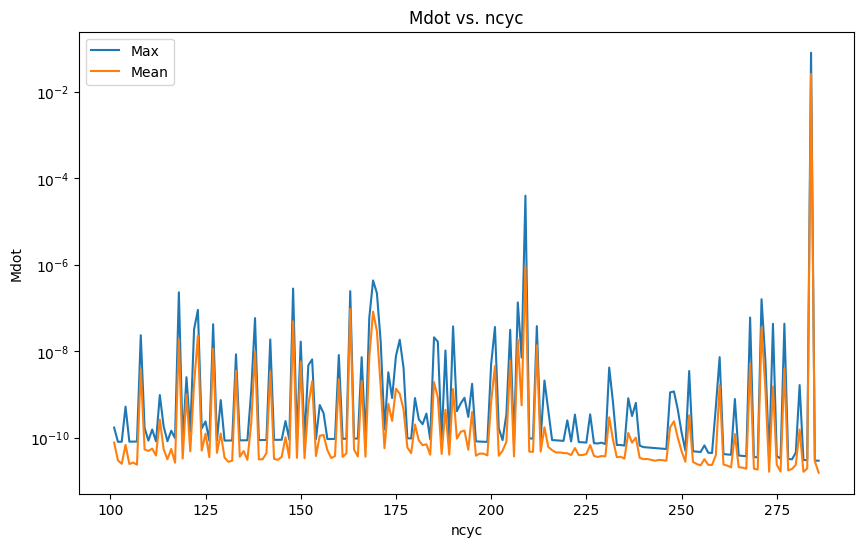

Index(['ncyc', 'time', 'Mwd', 'Ms', 'Mdot', 'a', 'Porb(hrs)', 'Lirr', 'Ls',
       'LRD', 'TeffWD', 'LWD', 'Lacc', 'Mboltot', 'Rwd', 'trec', 'dtime',
       'weighted_mdot'],
      dtype='object')


In [90]:
import matplotlib.pyplot as plt
summary = summary[100:-3]

# scale my y with log10
plt.figure(figsize=(10, 6))
plt.yscale("log")
# plt.plot(summary["ncyc"], summary["time"], label="Time")

# plt.plot(summary["ncyc"], summary["min"], label="Min")
plt.plot(summary["ncyc"], summary["max"], label="Max")
plt.plot(summary["ncyc"], summary["mean"], label="Mean")
plt.legend()
plt.xlabel("ncyc")
plt.ylabel("Mdot")
plt.title("Mdot vs. ncyc")
plt.show()
print(combined_df.columns)

 - column "inital Mdot = first line of the ncyc "Mdot"
 - column "final Mtod" = last line of ncyc "mdot" (should be max)
 - "dtime - recurrence" = last - prev.ncyc.last (take the "trec")
 - remove last ncyc from file. 
 - remove 1-2 first ncyc from file.
 - add to the table "Ms" "Mwd" 
 - Dp (delta Porb)  = first - last.prev.ncyc / current.Porb 
 - play with graphs over time 

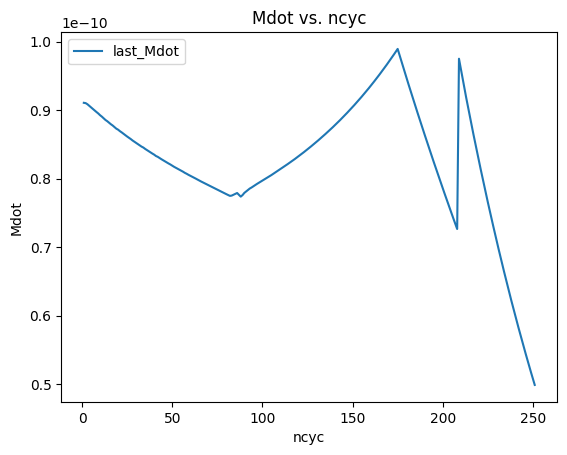

In [91]:
# === Summarize Each Cycle ===
summary_combined_df = combined_df.groupby("ncyc").agg(
    initial_Mdot=('Mdot', 'first'),
    final_Mdot=('Mdot', 'last'),
    time_end=('time', 'last'),
    time_start=('time', 'first'),
    trec_last=('trec', 'last'),
    Porb_hrs=('Porb(hrs)', 'last'),
    Ms=('Ms', 'last'),
    Mwd=('Mwd', 'last')
).reset_index()
summary_combined_df = summary_combined_df[summary_combined_df["initial_Mdot"] < filter_value]
# Calculate time between end of current and previous cycle
summary_combined_df['dtime_recurrence'] = summary_combined_df['time_end'].diff()
summary_combined_df['Dp'] = (summary_combined_df['time_start'] - summary_combined_df['time_end'].shift(1)) / summary_combined_df['Porb_hrs']

# === Clean Main DataFrame ===
ncyc_ids = df['ncyc'].unique()

# Remove last, and first two cycles
if len(ncyc_ids) >= 3:
    cleaned_df = df[~df['ncyc'].isin([ncyc_ids[0], ncyc_ids[1], ncyc_ids[-1]])]
else:
    cleaned_df = df.copy()

# === Plotting ===
summary_combined_df = summary_combined_df[:250]
# plt.yscale("log")
# plt.plot(summary_combined_df["ncyc"], summary_combined_df["initial_Mdot"], label="initial_Mdot")
plt.plot(summary_combined_df["ncyc"], summary_combined_df["final_Mdot"], label="last_Mdot")
plt.legend()
plt.xlabel("ncyc")
plt.ylabel("Mdot")
plt.title("Mdot vs. ncyc")
plt.show()

- option to export
- first_porb = first_porb
- look in deep into any N ncyc: plot for each ncyc
- plot: x = log(time)
        y = log(Mdot)

claster algo, kmean (filter by time_len or Delta_time?)

GUI